In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline



In [4]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Переменная, которую надо предсказать - ’MEDV’.

In [7]:
# посмотрим, что и в каких типах есть в датасете, а так же посмотрим есть ли тут null
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [8]:
# Посмотрим стольнужную расшировку по столбцам, для изучения данных.
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Узнаем, что medv имеет максимальное значение 50.0 единиц

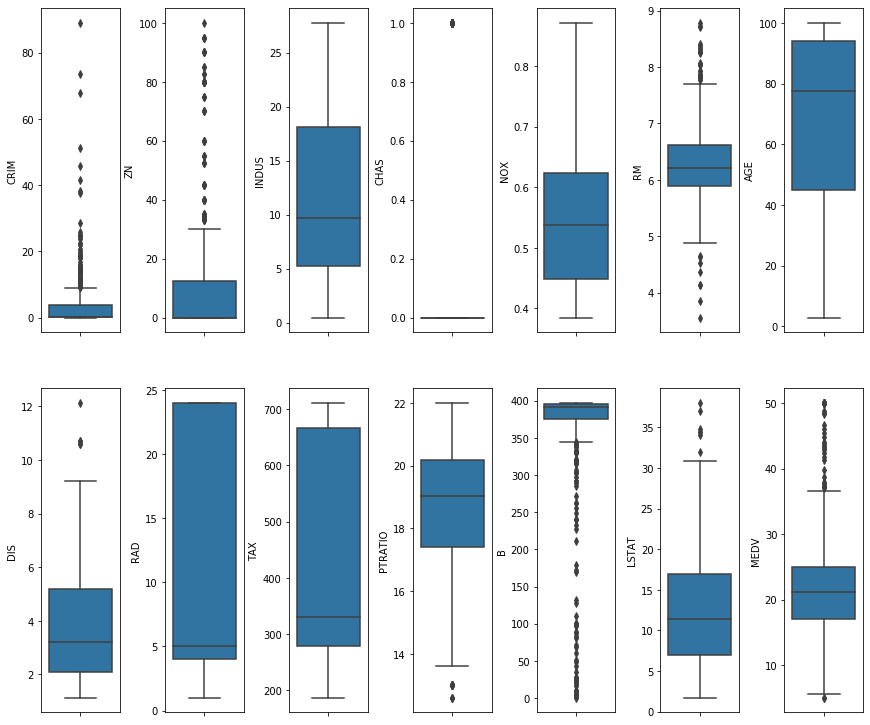

In [9]:
# Постоим боксплоты наглядного представления выбросов в данных
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Видим, что столбики CRIM, ZN, B, RM, MEDV имеют большое количество выбросов

In [10]:
import pandas_profiling
data.profile_report()

In [11]:
# Посмотрим процент выбросов в данных
for k, v in data.items():
# считаем точки в квантиле 25% от медианы
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    # выбросы находятся за этими точками
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Выбросы колонки %s = %.2f%%" % (k, perc))


Выбросы колонки CRIM = 13.04%
Выбросы колонки ZN = 13.44%
Выбросы колонки INDUS = 0.00%
Выбросы колонки CHAS = 100.00%
Выбросы колонки NOX = 0.00%
Выбросы колонки RM = 5.93%
Выбросы колонки AGE = 0.00%
Выбросы колонки DIS = 0.99%
Выбросы колонки RAD = 0.00%
Выбросы колонки TAX = 0.00%
Выбросы колонки PTRATIO = 2.96%
Выбросы колонки B = 15.22%
Выбросы колонки LSTAT = 1.38%
Выбросы колонки MEDV = 7.91%


7.91% вроде это и есть те 16 значений 50 которые не лежат в основной выборке. По этому уберем их это не должно стать большой потерей для датасета

In [12]:
# замерим сколько у нас значений в исходном датасете и после сокращения данных
print(np.shape(data))
data = data.query('MEDV < 50')
print(np.shape(data))

(506, 14)
(490, 14)


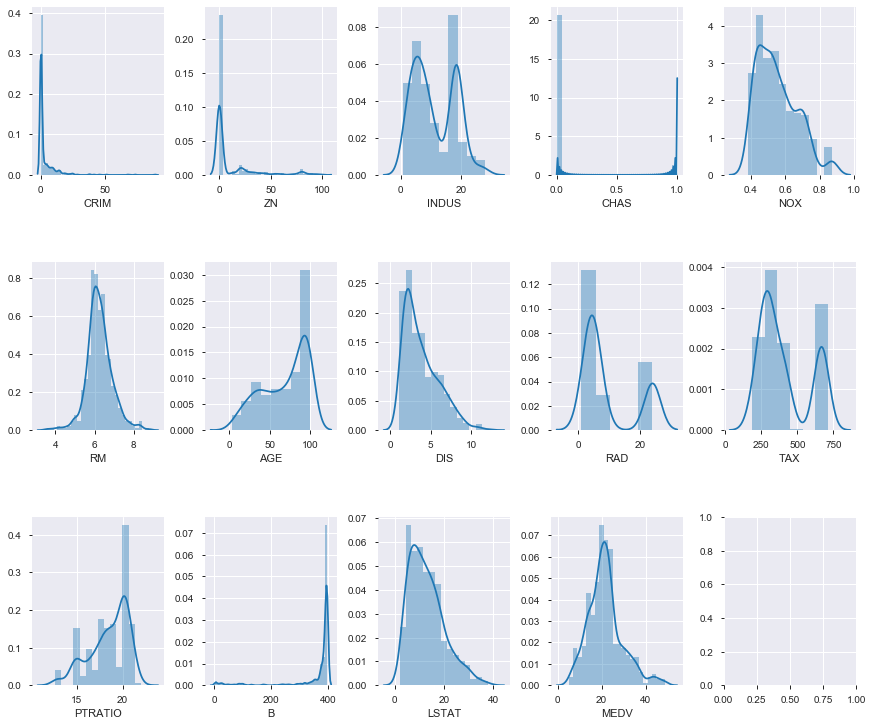

In [13]:
# Плотность распредления значений
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

MEDV похоже на нормальное распределение

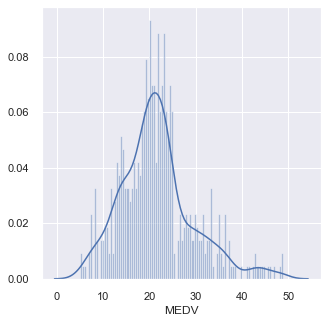

In [14]:
# построим отдельный граффик плотности распределения для искомой колонки
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['MEDV'], bins=100)
plt.show()

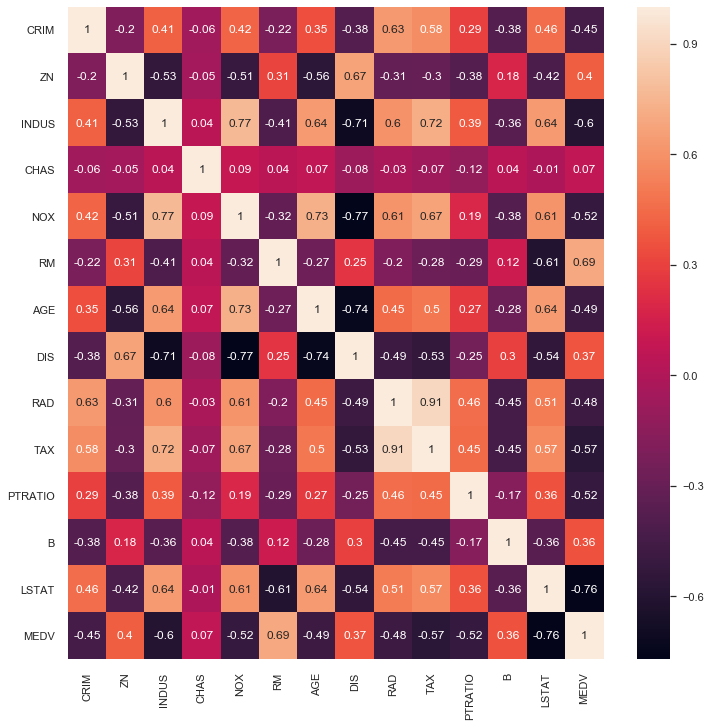

In [15]:
# построим матрицу корреляций
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [16]:
print(sorted(correlation_matrix['MEDV']))

[-0.76, -0.6, -0.57, -0.52, -0.52, -0.49, -0.48, -0.45, 0.07, 0.36, 0.37, 0.4, 0.69, 1.0]


Для построения модели нам нужны все значения которые кореллируют с искомым значением в положительном или отрицательным индексом. Из данных матрицы мы видим наиболее всего с данными MEDV кореллирует RM(0.7) и LSTAT(-0.79). Но так же нас интересуют все значения с корелляций больше ~0.50 (LSTAT, INDUS, RM, TAX, NOX, PTRAIO)

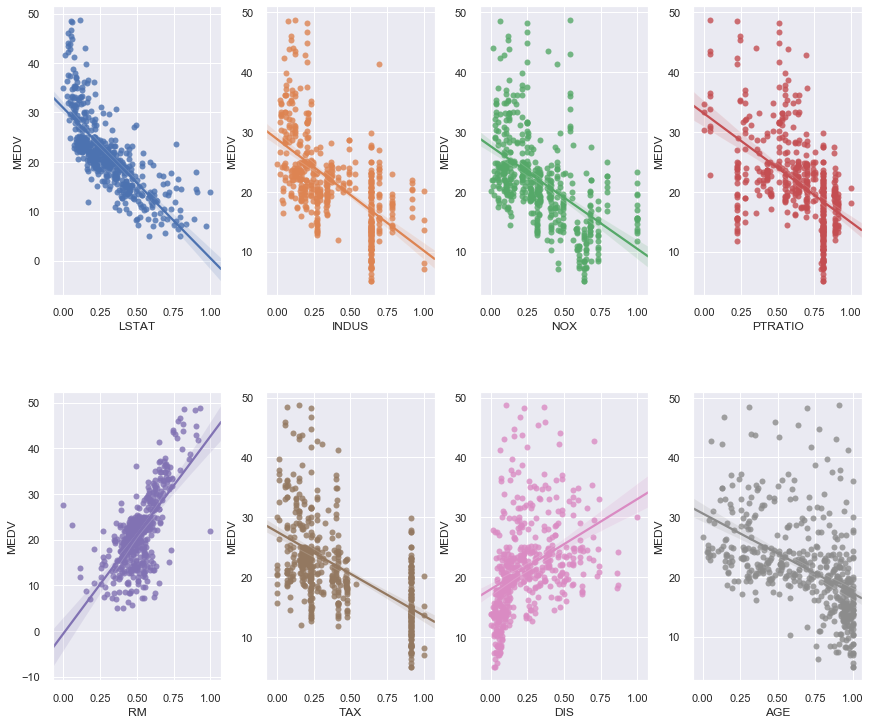

In [17]:
from sklearn import preprocessing
# нормализуем значения перед отрисовкой MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*   Линейная зависимость от переменной RM. Есть выбросы
*   Цена уменьшается, если увеличивается значение LSTAT. 
*   Цена увеличивается, если увеличивается TAX, нелинейная зависимость, есть выбросы

Подводя итоги, мы можем выбрать для предсказания переменной MEDV такие значения, как 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'. 

# Линейная регрессия от одной переменной:

Используем линейную регрессию так как мы пытаемся выяснить число с моделью с наиболее кореллирующих данных с искомым атрибутом.

In [52]:
from sklearn.model_selection import train_test_split

x_train,x_test = train_test_split(data, test_size=0.3)
y_train,y_test = train_test_split(data, test_size=0.7)

In [53]:
from sklearn.linear_model import LinearRegression

lstat = data['LSTAT']
medv = data['MEDV']
model = LinearRegression()

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(lstat,
                                                 medv,
                                                 test_size = 0.3,# test
                                                 random_state = 3)
result = model.fit(np.array(x_train).reshape(-1,1), y_train)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 31.663790869296026
slope: [-0.78382032]


точность предсказаний:

In [55]:
model.score(np.array(x_test).reshape(-1,1), y_test)

0.5885615372012363

59% на тестовых данных. Вроде средний результат

Посмотрим на линейную регрессию от одной переменной:

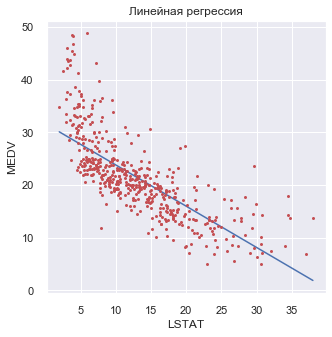

In [56]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия')
x = np.linspace(min(lstat), max(lstat), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(lstat, medv, 'r.')
plt.show()

Имеется большой разброс по этому и есть такой небольшой результат в 58%

# Линейная регрессия от нескольких атрибутов:

Все значения с корелляций больше 0.50 можно использовать для регрессионой модели: 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'

50 потому как просто больше ждать из этого датасета жадть и не стоило

In [57]:
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
lstat = x['LSTAT']
indus = x['INDUS']
nox = x['NOX']
ptratio = x['PTRATIO']
rm = x['RM']
tax = x['TAX']
dis = x['DIS']
age = x['AGE']

y = data['MEDV']
x = np.vstack([np.array(lstat), np.array(indus), np.array(nox), 
               np.array(ptratio), np.array(rm), np.array(tax), 
              np.array(dis), np.array(age)]).T
print('x - это многомерная матрица,: ')
print(x[:3])

X_train,X_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

model = LinearRegression().fit(X_train, y_train)

x - это многомерная матрица,: 
[[  4.98     2.31     0.538   15.3      6.575  296.       4.09    65.2   ]
 [  9.14     7.07     0.469   17.8      6.421  242.       4.9671  78.9   ]
 [  4.03     7.07     0.469   17.8      7.185  242.       4.9671  61.1   ]]


In [58]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 30.504375017448776
slope: [-3.46494653e-01 -1.07248752e-01 -8.19471219e+00 -7.68080047e-01
  3.79275025e+00 -6.25763985e-03 -9.35123153e-01 -3.07351432e-02]


In [59]:
model.score(X_test, y_test)

0.7494809002543228

Модель предсказывает 75% давольно не плохо.

конечно сознаюсь, эта задача была разобрана на другой лекции по математики и это практически перенесенное решение. Но все ровно это каждая ячейка была мной изучена 